In [2]:

# from google.colab import drive

# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/SER_Capstone/




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import random
import sys

# librosa is a Python library for analyzing audio and music. 
import librosa
import librosa.display
# import librosa.display.waveplot # seems to not exist anymore

from scipy import signal 
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# to play the audio files
import IPython.display as ipd


# import keras
# from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense
# from keras.models import Model
# from keras.metrics import Recall
# from tensorflow.keras.optimizers import Adam 
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import models, layers

import os
import glob
import shutil


import pickle


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [4]:
Emo_path = 'Emo_to_clip/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                 
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    if file.startswith('.'):
                        pass
                    else:
                        file_emotion.append(emotions.lower())
                        file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                        file_actor.append(dir)
     

In [5]:
print(f'Number oaf file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number oaf file paths: 6893,      Number of emotions listed: 6893,      Number of actors listed: 6893


In [6]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,Emo_to_clip/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,Emo_to_clip/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,Emo_to_clip/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,Emo_to_clip/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,Emo_to_clip/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,Emo_to_clip/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,Emo_to_clip/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,Emo_to_clip/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,Emo_to_clip/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
#### Will come back to this for a more polished final product

#### 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
#### 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensible)
#### 3 Speed up/slow down (while maintaining pitch) by up to 50%
#### Can do a few pass-throughs of dataset 
#### Randomly assign 1,2, 3 or a combination to a file 


## Come back to this in the future (after MVP or after )

### Increase Dataset with new data to train on with augmented data - (add noise) add more diverse voices/accents

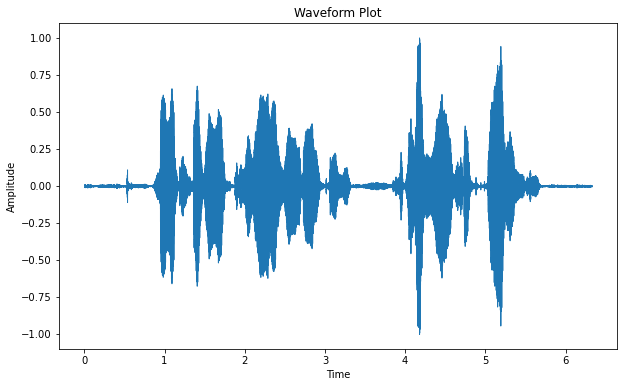

In [7]:
file_name='Emo_to_clip/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_00003.wav')





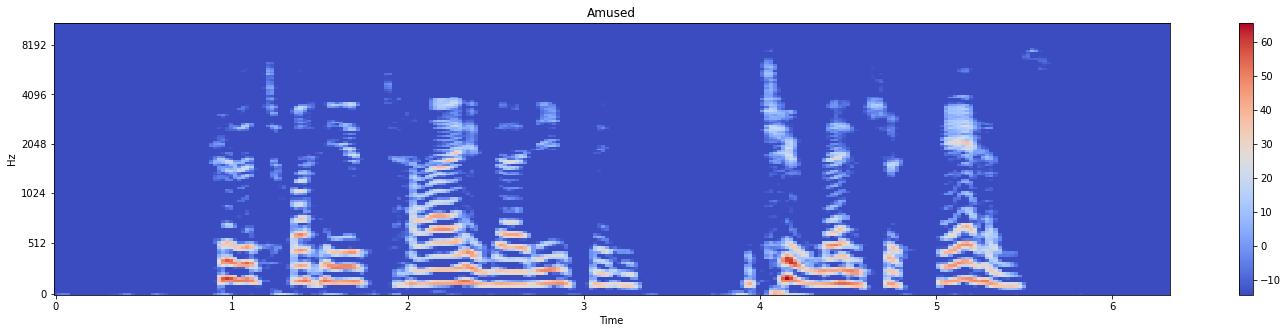

In [8]:
# Creating A basic Mel Spectrogram from our audio sample above 
spectrogram = librosa.feature.melspectrogram(audio_data)
s_db = librosa.amplitude_to_db(spectrogram)
fig, ax = plt.subplots(figsize=(25, 5))

amuse = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
ax.set(title="Amused")
fig.colorbar(amuse, ax=ax);
##plt.savefig('file/path')

## EDA Visuals

In [9]:
df.emotion.value_counts()

sleepy       1721
neutral      1568
amused       1317
angry        1268
disgusted    1019
Name: emotion, dtype: int64

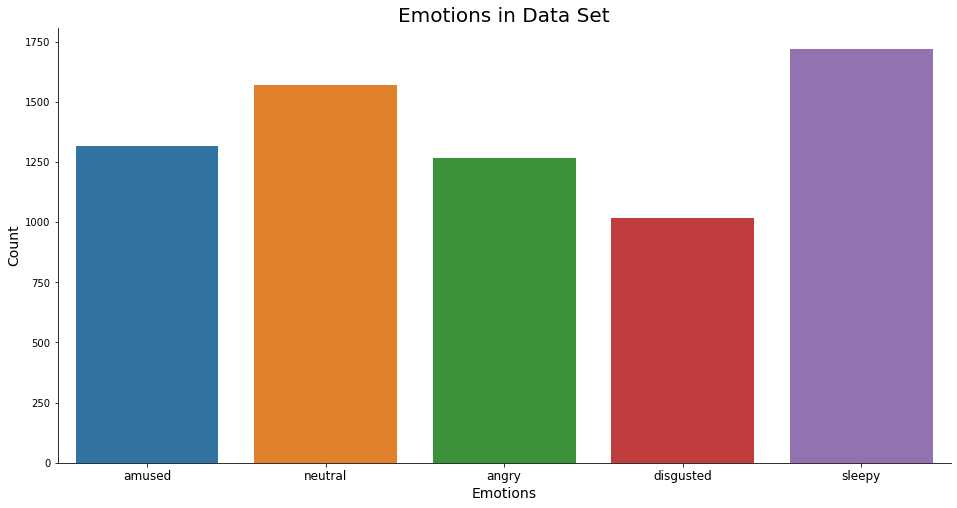

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.emotion)
plt.title('Emotions in Data Set', size=20)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Emotion_count')
plt.show()

sam      2453
jenie    1790
bea      1787
josh      863
Name: actor, dtype: int64


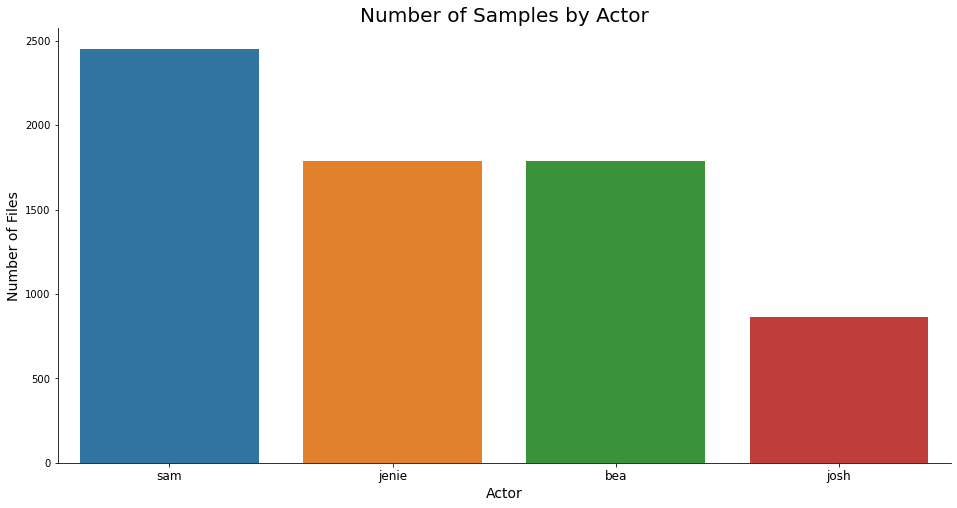

In [11]:
print(df.actor.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.actor)
plt.title('Number of Samples by Actor', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Actor', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Actor_count')
plt.show()

female    3577
male      3316
Name: sex, dtype: int64


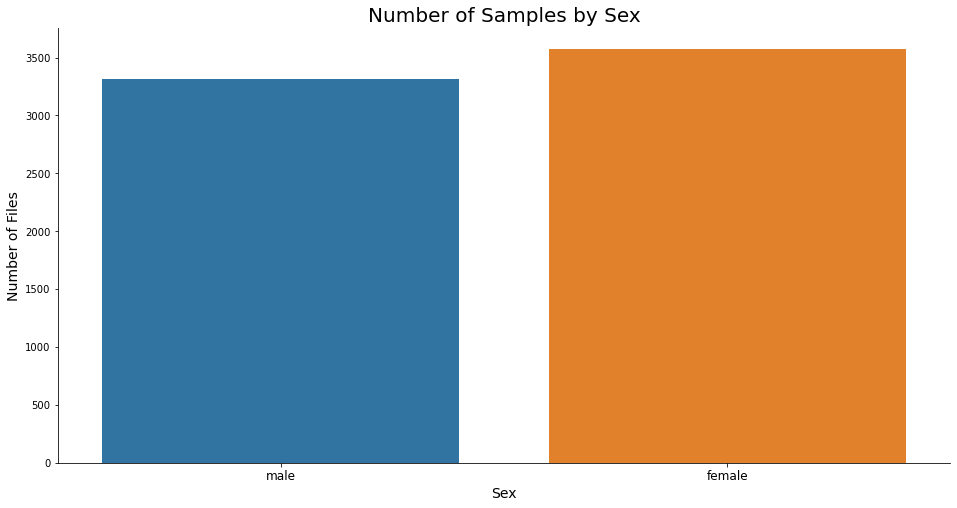

In [12]:
print(df.sex.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.sex)
plt.title('Number of Samples by Sex', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Sex', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/sex_count')
plt.show()

We will need to agument data to account for the variablity in human speech and audio equipment 
Will add random whitenoise
Will randomly speed up/slow down audio
NO PITCH CHANGE!

Will then do Time and Frequency Masking with SpecAugment to prevent overfitting and to help the model generalise better. The masked sections are replaced with the mean value. https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5 for markdown info writeup


## Augmenting the Data

Will augment raw files and save as new randomized files in new directory_1

Will get spectrograms and save in new directory_2

Then will do Time and Frequency Masking and get finalized spectrograms and save in new directory_3

# Will come back to Data Augmentation later for MVP


# For now lets just convert to raw spectrograms for the baseline


# Data Prep Pipeline


## What happens when we do encounter silence??

## [RESAMPLE AT CONSTANT RATE??: ](http://opensoundscape.org/en/latest/tutorials/audio_and_spectrogram.html#:~:text=To%20save%20the%20created%20spectrogram,Library%20(PIL)%20Image%20object.&text=Save%20the%20PIL%20Image%20using,want%20to%20save%20the%20image.)

Go through all files in directory and add to df if name is in original path in new column. If name has emotion can strip it. Can augment sound files and re-save sprectrograms of augmented. (Combine with originals for larger dataset? or just use noisier data ?)

Next we need to augment our data in order to prevent over-fitting and make our model more generalizable.
We will do this by injecting noise, slowing the sound clips, speeding up the sound clips, and 

We will then extract features, trim the data, extract features without augmentation, add noise a and vertically stack (essentially stacking an array and turning into a matrix which we will then convert to our spectrogram, then add stretch vert stack, and pitch v stack )

In [13]:
def noise(data):
    amplitude = 0.05*np.random.uniform()*np.amax(data)
    data = data + amplitude*np.random.normal(size=data.shape[0])
    return data

def speed_random(data):
    random_rate = round(random.uniform(0.5, 1.5), 2)
    return librosa.effects.time_stretch(data, random_rate)


def pitch(data, sampling_rate):
    random_pitch = round(random.uniform(.5, 3), 1)
    return librosa.effects.pitch_shift(data, sampling_rate, random_pitch)

def silence_trimmer(data_sampling_rate):
    return


### NEED SILENCE TRIMMER??

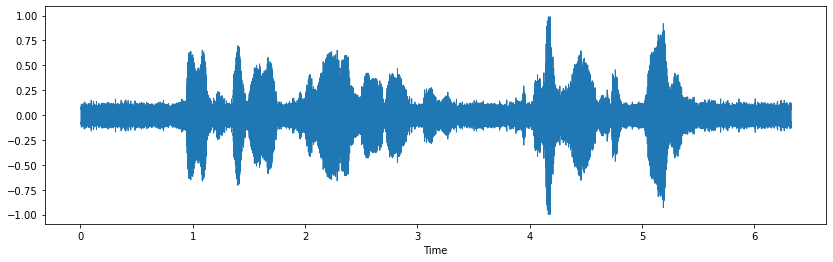

In [14]:
file_name='Emo_to_clip/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate) #Base Audio


x = noise(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

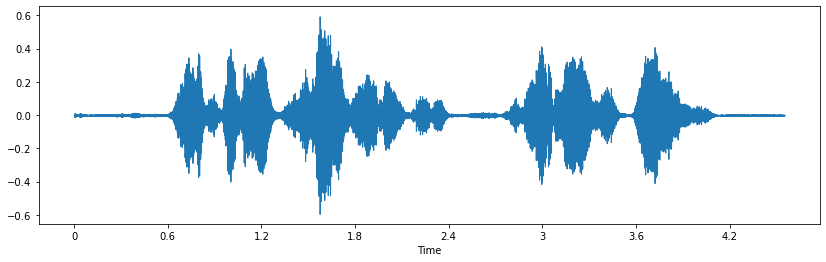

In [15]:
file_name='Emo_to_clip/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = speed_random(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

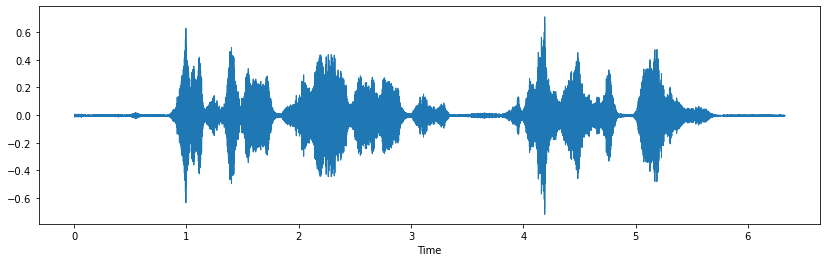

In [16]:
file_name='Emo_to_clip/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = pitch(audio_data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

# Next will fix data disappearance! possibly augment sound data/trim silence

Data missing was from faulty folder function. Will again do train/test split COPYING images into separate train and test folders this time. Will then manually move files into emotion folders and reupload(?)

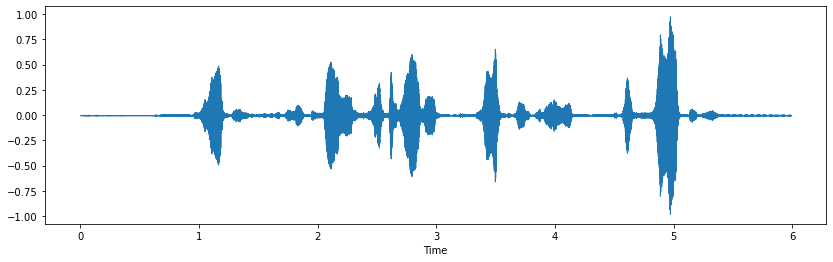

In [22]:
file_name='practice_clips/practice_clips00002.wav'



audio_data_test, sampling_rate_test = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=audio_data_test, sr=sampling_rate_test)
ipd.Audio(audio_data_test, rate=sampling_rate_test)